# Best Neighborhoods in Pittsburgh

## Metric 
**Monthly Crime Report** \
This metric represents monthly crime report data for different neighborhoods in Pittsburgh, sourced from WPRDC. It reflects the frequency of crimes occurring in each area. This measure helps identify which communities experience fewer criminal activities, thereby offering residents a greater sense of security.

In [2]:
import pandas as pd
%matplotlib inline

In [3]:

data = pd.read_csv("Pittsburgh-Monthly-Crime-report.csv")
data.describe()

/scratch/slurm-21741/ipykernel_1404440/2792773480.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Pittsburgh-Monthly-Crime-report.csv")


,_id,Hour,XCOORD,YCOORD
count,69476.000000,69476.000000,68864.000000,68874.000000
mean,34738.500000,13.266293,-79.971599,40.441281
std,20056.137988,6.322202,0.153053,0.044940
min,1.000000,0.000000,-80.822600,39.000000
25%,17369.750000,9.000000,-80.001900,40.428800
50%,34738.500000,14.000000,-79.985300,40.444000
75%,52107.250000,18.000000,-79.942400,40.457400
max,69476.000000,23.000000,-74.000000,42.000000


In [11]:

count_neighborhoods = {}

for neighborhood in data["Neighborhood"]:
    if neighborhood in count_neighborhoods:
        count_neighborhoods[neighborhood] += 1
    else:
        count_neighborhoods[neighborhood] = 1

sorted_dict = dict(sorted(count_neighborhoods.items(), key=lambda item: item[1]))

print("Total reported crime in Ascending order: ")
for neighborhood, amount in sorted_dict.items():
    print(f'{neighborhood}: {amount}')

Total reported crime in Ascending order: 
Saint Clair: 25
Ridgemont: 32
Chartiers: 38
New Homestead: 51
Swisshelm Park: 61
East Carnegie: 75
Summer Hill: 77
Esplen: 79
Oakwood: 84
Regent Square: 95
Hays: 100
Mount Oliver: 104
Fairywood: 107
Arlington Heights: 122
Glen Hazel: 125
Allegheny West: 125
Windgap: 144
Spring Garden: 151
Polish Hill: 192
Morningside: 193
Westwood: 203
Bon Air: 207
Stanton Heights: 211
Fineview: 217
Upper Hill: 224
Duquesne Heights: 230
Friendship: 237
Lincoln Place: 240
Southshore: 255
Upper Lawrenceville: 256
West End: 256
Homewood West: 304
West Oakland: 305
Arlington: 311
Banksville: 336
Lower Lawrenceville: 352
Manchester: 360
Overbrook: 371
Lincoln-Lemington-Belmar: 384
Beltzhoover: 393
Perry North: 404
California-Kirkbride: 443
Northview Heights: 452
Elliott: 469
Point Breeze North: 471
Spring Hill–City View: 487
Crafton Heights: 489
Terrace Village: 507
Point Breeze: 508
Allegheny Center: 538
South Oakland: 547
Chateau: 552
Troy Hill: 558
Squirrel Hill 

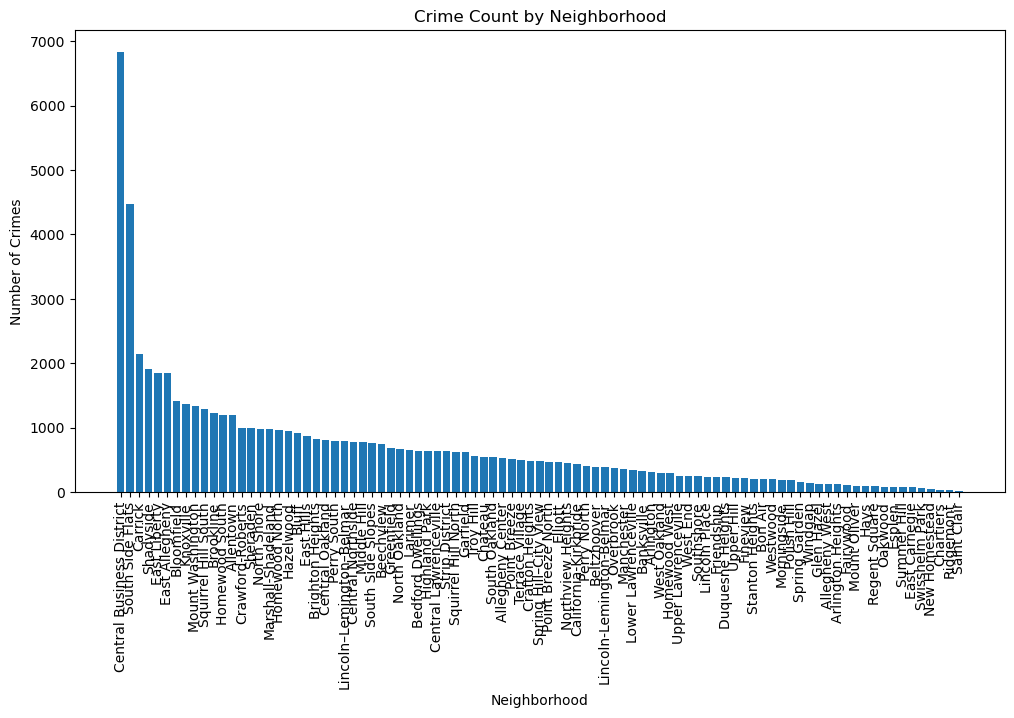

In [10]:
import matplotlib.pyplot as plt

cleaned_counts = {str(k): int(v) for k, v in count_neighborhoods.items() if pd.notna(k)}

sorted_counts = dict(sorted(cleaned_counts.items(), key=lambda item: item[1], reverse=True))

# Plot
plt.figure(figsize=(12,6))
plt.bar(sorted_counts.keys(), sorted_counts.values())
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Crimes")
plt.title("Crime Count by Neighborhood")
plt.show()
